#  Project 1: Data Analysis and Visualization with Real-Life Marine Litter Dataset

Now, let's combine everything we have learned so far to work on a real life dataset.

This dataset provides valuable information about marine litter found at the seafloor of the southeastern North Sea. It was collected during scientific research aimed at understanding the distribution and impact of marine litter in this area. Here's a breakdown of the dataset description and its columns:

- **Citation:** The dataset is attributed to Lars Gutow and published by the Alfred Wegener Institute. It is part of a larger study that investigates marine litter in the North Sea. The dataset can be accessed through the provided DOI link (https://doi.org/10.1594/PANGAEA.890785)

- **Location:** The dataset is specific to the North Sea.

- **Campaign:** The specific research campaign under which this data was collected was "HE419".

- **Method/Device:** A beam trawl (BEAM) was used to collect marine litter data from the seafloor.

## Dataset Columns:
- **Station:** This identifies the specific sampling station where the data was collected.
- **Date/Time:** The exact date and time of the sampling at the station.
- **Latitude:** The geographic latitude of the sampling point.
- **Longitude:** The geographic longitude of the sampling point.
- **Elevation [m]:** The depth at which the sampling occurred, measured in meters.
- **Litter obj:** This column likely records the specific litter object(s) found during sampling.
- **Litter cat:** This column categorizes the types of litter objects identified.
- **Litter fish:** This column may provide additional information regarding litter impacts on fish species or related observations.

This dataset is crucial for understanding marine pollution in the North Sea. It documents the types and quantities of litter found at various depths and locations, which can help researchers assess the impact of marine litter on marine ecosystems and contribute to environmental management efforts. The detailed metadata allows for effective spatial and temporal analyses, enabling scientists to track changes over time and identify potential sources of pollution.

Let’s start by **importing the libraries** we’ll need for our analysis. We’ll use Pandas for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for our visualizations. Setting these up first will help us later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that we have our libraries ready, let’s **load our dataset** from the CSV file. We’ll display the first few rows so we can get an idea of what the data looks like

In [5]:
file_path = 'data/marine_seafloor_litter.csv'
df = pd.read_csv(file_path)

litter_data = df.copy()
print("First few rows: ", litter_data.head())
print("Shape: ", litter_data.shape)

First few rows:           Event Station            Date/Time  Latitude  Longitude  \
0  HE419/004-8      H1   2014-04-03 7:18:00   54.0498     8.0828   
1  HE419/004-8      H1   2014-04-03 7:18:00   54.0498     8.0828   
2  HE419/004-8      H1   2014-04-03 7:18:00   54.0498     8.0828   
3  HE419/007-6     M03  2014-04-03 18:17:00   54.1355     7.0443   
4  HE419/009-5     M05  2014-04-03 23:14:00   54.2122     6.4518   

   Elevation [m]        Litter obj Litter cat Litter fish  
0            -18  plastic fragment   plastics          no  
1            -18     metal texture      metal          no  
2            -18      glass bottle      glass          no  
3            -32         net fiber   plastics         yes  
4            -34         net fiber   plastics         yes  
Shape:  (271, 9)


Next, we’ll check for any **missing values** in our dataset:

In [7]:
missing_values = litter_data.isnull().sum()
print('Missing values in Dataset:', missing_values)

Missing values in Dataset: Event             0
Station          26
Date/Time         0
Latitude          0
Longitude         0
Elevation [m]     0
Litter obj        0
Litter cat        0
Litter fish       0
dtype: int64


In [4]:
litter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Event          271 non-null    object 
 1   Station        245 non-null    object 
 2   Date/Time      271 non-null    object 
 3   Latitude       271 non-null    float64
 4   Longitude      271 non-null    float64
 5   Elevation [m]  271 non-null    int64  
 6   Litter obj     271 non-null    object 
 7   Litter cat     271 non-null    object 
 8   Litter fish    271 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.2+ KB


We can see how many missing values are in each column. Now we can get **handle the missing values** by using the **fillna()** function and we can check the missing values in our dataframe again:

In [8]:
litter_data['Station'] = litter_data['Station'].fillna('Unknown')
print("Missing values in Dataset:\n", litter_data.isnull().sum())

Missing values in Dataset:
 Event            0
Station          0
Date/Time        0
Latitude         0
Longitude        0
Elevation [m]    0
Litter obj       0
Litter cat       0
Litter fish      0
dtype: int64


Let’s also **check for duplicate entries** in our dataset. If we find any, we’ll remove them to ensure our analysis is based on unique observations.

In [10]:
duplicates = litter_data.duplicated().sum()
print("\nNumber of duplicate entries:", duplicates)

litter_data =litter_data.drop_duplicates(keep='first')
print('\nData after dropping duplicates:', litter_data.shape)


Number of duplicate entries: 156

Data after dropping duplicates: (115, 9)


Now, let’s **handle the outliers** in our dataframe with the *Interquartile Range (IQR)* method:

In [14]:
def handle_outliers(df):
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.columns:
        if np.issubdtype(df_outliers_removed[column].dtype, np.number):
            q1 = df_outliers_removed[column].quantile(0.25)
            q3 = df_outliers_removed[column].quantile(0.75)
            iqr = q3-q1

            lower_threshold = q1 - 1.5 *iqr
            upper_threshold = q3 + 1.5 * iqr

            df_outliers_removed = df_outliers_removed[~((df_outliers_removed[column] < lower_threshold) |
                                      (df_outliers_removed[column] > upper_threshold))]
    return df_outliers_removed

litter_data = handle_outliers(litter_data)
print("Shape of dataset after dropping outliers:", litter_data.shape)

Shape of dataset after dropping outliers: (104, 9)


Let’s **calculate how many times in our datafram were there fish present alongside litter**.

We’ll use a condition to check if Litter fish equals 'yes', and then count those occurrences. This will give us a clearer picture of the relationship between litter and fish populations.

In [16]:
litter_fish_count = {'yes': 0, 'no': 0}

for value in litter_data['Litter fish']:
    if value == 'yes':
        litter_fish_count['yes'] +=1
    else:
        litter_fish_count['no']+=1

print('Litter fish presence count:', litter_fish_count)

Litter fish presence count: {'yes': 59, 'no': 45}


The code checks how many times 'yes' appears in the 'Litter fish' column of litter_data.

The result shows how many entries are 'yes' and how many are not.

Now, let's **filter** the dataset to look specifically at **plastic litter** since it's a significant issue in marine environments. We’ll create a new DataFrame that *contains only plastic litter*. We’ll create a new DataFrame that contains only plastic litter and calculate the percentage of plastic litter in the dataset.

In [21]:
plastic_litter = litter_data[litter_data['Litter cat'] == 'plastics']
print('Plastic Litter Data', plastic_litter.shape)

total_rows = litter_data.shape[0]
plastic_litter_rows = plastic_litter.shape[0]

percentage_plastic_litter = (plastic_litter_rows / total_rows) * 100
print(f'Percentage of plastic litter: {percentage_plastic_litter:.2f} %')



Plastic Litter Data (97, 9)
Percentage of plastic litter: 93.27 %


Next, let’s **slice our DataFrame to focus on the columns that matter for our analysis**. We’ll keep the Station, Date/Time, Litter Object, Litter Category, and Litter Fish columns.

In [22]:
litter_data = litter_data[['Station', 'Date/Time', 'Elevation [m]', 'Litter obj', 'Litter cat', 'Litter fish']]
print('\n Sliced Data: \n',litter_data.head())


 Sliced Data: 
   Station            Date/Time  Elevation [m]        Litter obj Litter cat  \
0      H1   2014-04-03 7:18:00            -18  plastic fragment   plastics   
1      H1   2014-04-03 7:18:00            -18     metal texture      metal   
2      H1   2014-04-03 7:18:00            -18      glass bottle      glass   
3     M03  2014-04-03 18:17:00            -32         net fiber   plastics   
4     M05  2014-04-03 23:14:00            -34         net fiber   plastics   

  Litter fish  
0          no  
1          no  
2          no  
3         yes  
4         yes  


Let’s **visualize the relationship between different types of litter and the fish populations** associated with them. We’ll create a bar plot to see how many fish species are linked to each litter category.

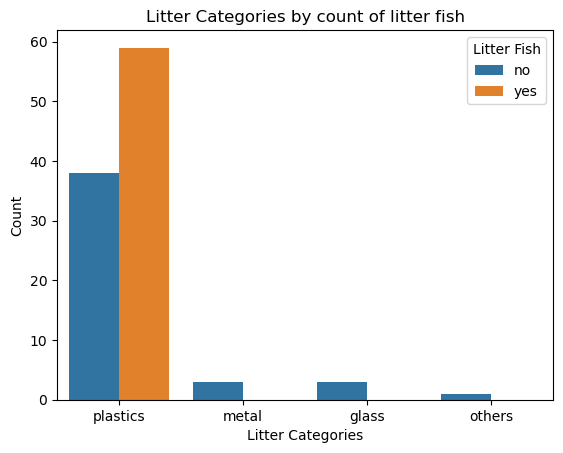

In [23]:
sns.countplot(litter_data,x='Litter cat',hue='Litter fish')
plt.title('Litter Categories by count of litter fish')
plt.xlabel('Litter Categories')
plt.ylabel('Count')
plt.legend(title = 'Litter Fish')
plt.show()

Now, let's **analyze how the amount of litter collected changes over time** by visualizing litter counts against the sampling date.

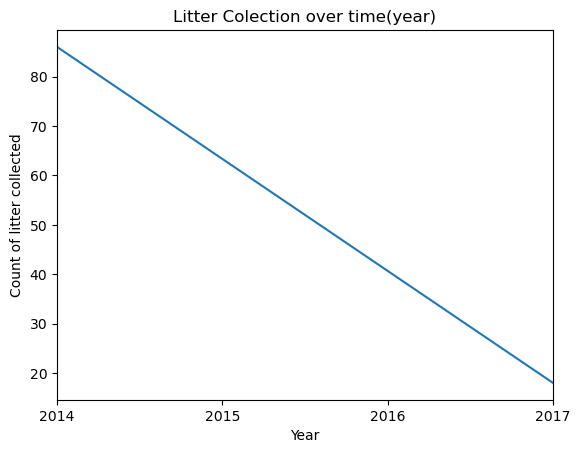

In [24]:
litter_data['Date/Time'] = pd.to_datetime(litter_data['Date/Time'])

litter_data['Year'] = litter_data['Date/Time'].dt.to_period('Y')
litter_data_counts = litter_data['Year'].value_counts().sort_index()

litter_data_counts.plot()
plt.title('Litter Colection over time(year)')
plt.xlabel('Year')
plt.ylabel('Count of litter collected')
plt.show()

This line plot displays the number of litter objects collected over time. By visualizing litter collection on a timeline, we can identify trends or spikes in litter accumulation, which may correspond to specific events or seasonal patterns, providing insights for further research or action.

Now **let's examine the relationship between litter objects and fish populations**. We'll create a count plot to visualize how many different types of litter objects were found in samples where fish were present. First, we'll filter our dataset to include only those entries where Litter fish is marked as 'yes'. This will give us the data specifically related to the interaction between litter and fish.

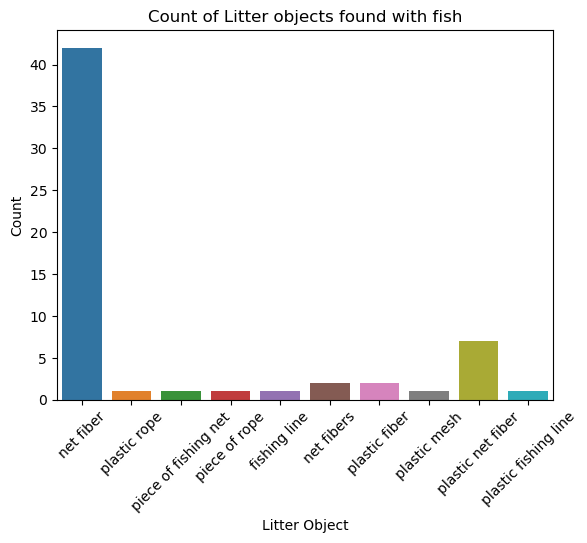

In [29]:
def litter_objects_found(litter_data):
    litter_fish_data = litter_data[litter_data['Litter fish'] == 'yes']
    sns.countplot(data=litter_fish_data, x= 'Litter obj')
    plt.title('Count of Litter objects found with fish')
    plt.xlabel('Litter Object')
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

litter_objects_found(litter_data)

With our graph we can see that there are multiple litter objects that have similar but not the same naming, before we standarize our data let's **check if they fall under the same litter category**:

In [30]:
litter_fish_data = litter_data[litter_data['Litter fish'] == 'yes']
unique_items_per_group = litter_fish_data.groupby('Litter obj')['Litter cat'].unique()
unique_items_per_group

Litter obj
fishing line            [plastics]
net fiber               [plastics]
net fibers              [plastics]
piece of fishing net    [plastics]
piece of rope           [plastics]
plastic fiber           [plastics]
plastic fishing line    [plastics]
plastic mesh            [plastics]
plastic net fiber       [plastics]
plastic rope            [plastics]
Name: Litter cat, dtype: object

With this grouping we now know that **they are all the same category = 'plastics'**, so our next step is to standarize our data.

To **standardize the values in the Litter obj column** we can use the Pandas *.replace()* method. Here's how to do that:

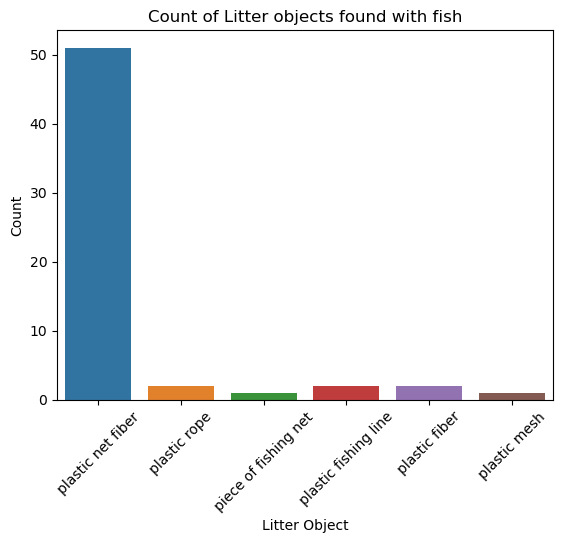

In [31]:
litter_data['Litter obj'] = litter_data['Litter obj'].replace({
    'net fibers' : 'plastic net fiber',
    'net fiber': 'plastic net fiber',
    'piece of rope':'plastic rope',
    'fishing line': 'plastic fishing line',
    'piece of fishing line': 'plastic fishing line'
})

litter_objects_found(litter_data)

Next, let's analyze the **relationship between elevation (depth) and litter category** with a boxplot that can show how litter types are distributed across different elevations:

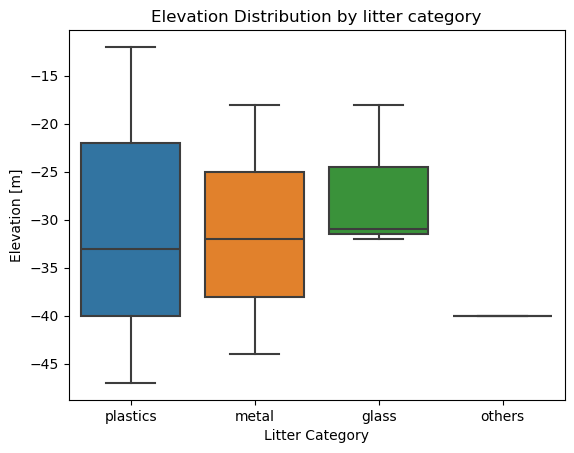

In [32]:
sns.boxplot(data=litter_data, x = 'Litter cat', y='Elevation [m]')
plt.title('Elevation Distribution by litter category')
plt.xlabel('Litter Category')
plt.ylabel('Elevation [m]')
plt.show()